<h1 style="text-align: center;">Image Classification with CNN<br><br>CIFAR-10 Data<br><h1>

# Dataset Info

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

Here are the classes in the dataset, as well as 10 random images from each:

![3Dto2D](https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [6]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

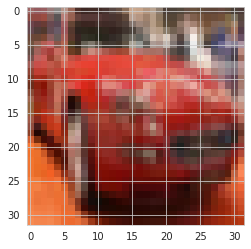

In [7]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [8]:
y_train[5]

array([1], dtype=uint8)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [12]:
pd.Series(y_train.flatten()).value_counts()

6    5000
9    5000
4    5000
1    5000
2    5000
7    5000
8    5000
3    5000
5    5000
0    5000
dtype: int64

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
y_train[0]

array([6], dtype=uint8)

In [15]:
y_train[0][0]

6

In [16]:
classes[y_train[0][0]]

'frog'

In [17]:
classes[int(y_train[0])]

'frog'

In [18]:
# independent from the subject, how int function turns an array into integer
np.random.randint(low=0, high=50000, size=1)

array([15445])

In [19]:
# independent from the subject, how int function turns an array into integer
int(np.random.randint(low=0, high=50000, size=1))

49976

In [20]:
# independent from the subject, how int function turns an array into integer
int(np.random.randint(low=0, high=50000, size=1))

7392

In [21]:
# independent from the subject, how int function turns an array into integer
X_train[int(np.random.randint(low=0, high=50000, size=1))]

array([[[ 81, 119,  57],
        [ 86, 120,  60],
        [ 93, 123,  65],
        ...,
        [100,  85,  79],
        [ 60,  50,  45],
        [ 36,  33,  21]],

       [[ 82, 116,  57],
        [ 84, 117,  60],
        [ 89, 119,  62],
        ...,
        [ 59,  49,  45],
        [ 54,  48,  38],
        [ 79,  79,  56]],

       [[ 93, 123,  69],
        [ 85, 115,  62],
        [ 87, 118,  64],
        ...,
        [ 28,  23,  17],
        [ 48,  47,  28],
        [ 87,  90,  57]],

       ...,

       [[102, 132,  68],
        [103, 135,  72],
        [103, 137,  73],
        ...,
        [ 76,  92,  58],
        [ 67,  84,  47],
        [ 65,  83,  41]],

       [[103, 129,  64],
        [100, 128,  63],
        [ 97, 127,  61],
        ...,
        [103, 104,  84],
        [ 96, 104,  78],
        [ 89,  98,  67]],

       [[107, 129,  63],
        [ 98, 123,  57],
        [ 98, 125,  59],
        ...,
        [127, 121,  90],
        [106, 112,  77],
        [ 98, 103,  70]]

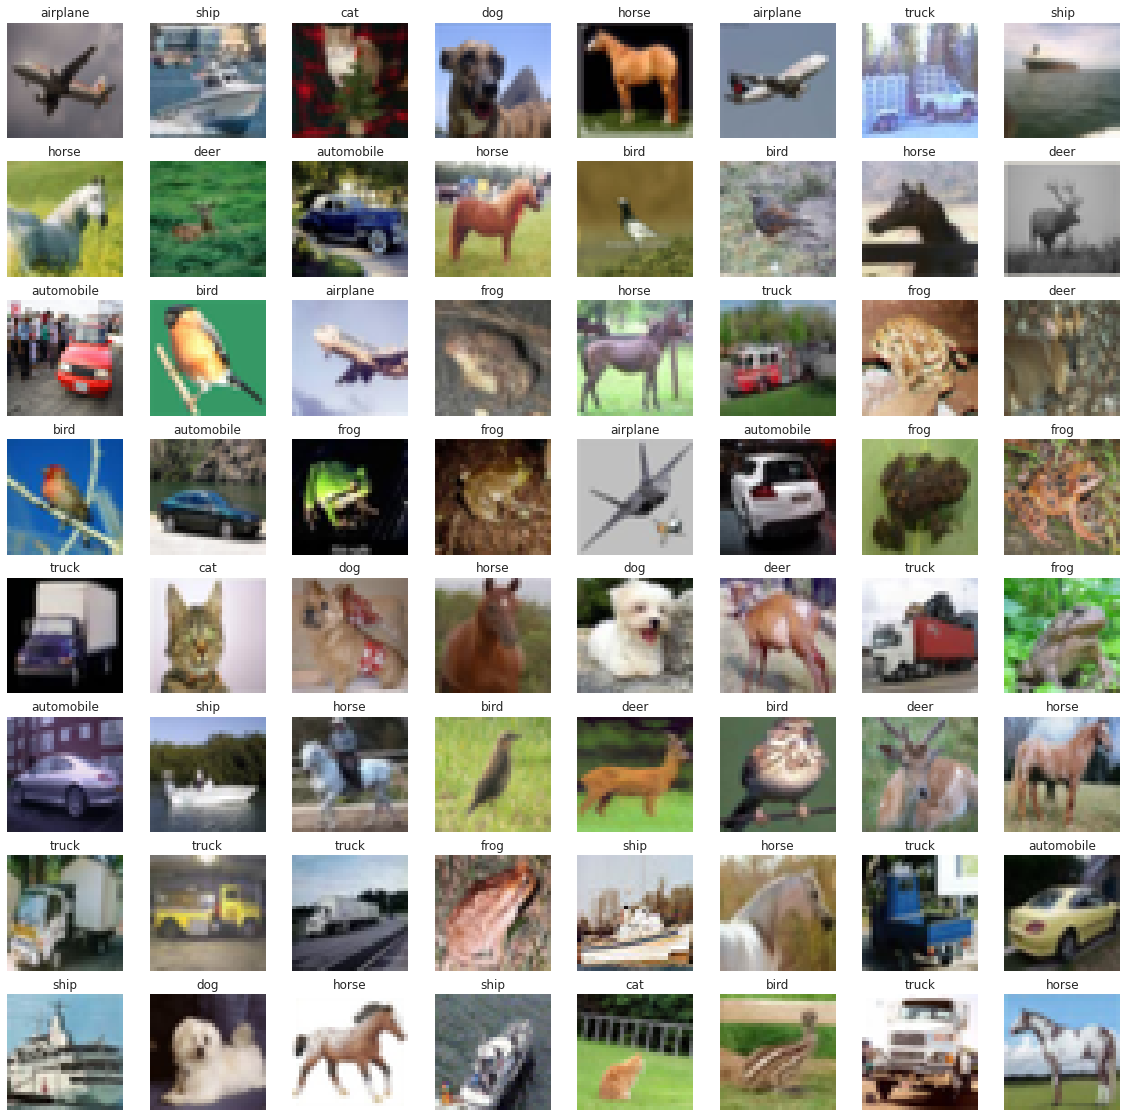

In [22]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

In [23]:
X_train[5].min()

0

In [24]:
X_train[5].max()

252

In [25]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [26]:
X_train[5].min()

0.0

In [27]:
X_train[5].max()

0.9882353

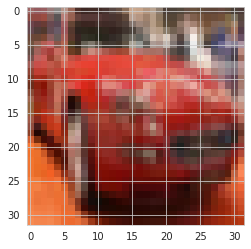

In [28]:
plt.imshow(X_train[5])

In [29]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [30]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [31]:
y_train.shape

(50000, 1)

In [32]:
from tensorflow.keras.utils import to_categorical

In [33]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [34]:
Y_train.shape

(50000, 10)

In [35]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Modelling-1

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [37]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [41]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 18s 5ms/step - loss: 1.4377 - accuracy: 0.4801 - val_loss: 1.2150 - val_accuracy: 0.5723
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0764 - accuracy: 0.6198 - val_loss: 1.0361 - val_accuracy: 0.6336
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9401 - accuracy: 0.6706 - val_loss: 0.9751 - val_accuracy: 0.6615
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8534 - accuracy: 0.7015 - val_loss: 0.9432 - val_accuracy: 0.6680
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7787 - accuracy: 0.7262 - val_loss: 0.9383 - val_accuracy: 0.6813
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7102 - accuracy: 0.7499 - val_loss: 0.9298 - val_accuracy: 0.6889
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6496 - accuracy: 0.7693 - val_loss: 0.8967 - val_accuracy

In [42]:
model.metrics_names

['loss', 'accuracy']

In [43]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.438,0.480,1.215,0.572
1,1.076,0.620,1.036,0.634
2,0.940,0.671,0.975,0.661
3,0.853,0.701,0.943,0.668
4,0.779,0.726,0.938,0.681


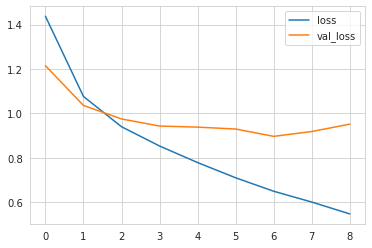

In [44]:
summary[["loss", "val_loss"]].plot();

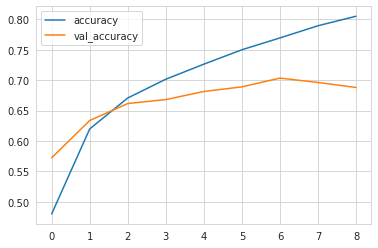

In [45]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8967 - accuracy: 0.7033


[0.8967469930648804, 0.7032999992370605]

In [48]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8967469930648804
Test accuracy: 0.7032999992370605


In [49]:
pred_prob = model.predict(X_test)

In [50]:
y_pred = np.argmax(pred_prob, axis=1)

In [51]:
y_pred

array([3, 8, 8, ..., 5, 4, 7])

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      1000
           1       0.84      0.78      0.81      1000
           2       0.66      0.55      0.60      1000
           3       0.48      0.56      0.52      1000
           4       0.68      0.62      0.65      1000
           5       0.59      0.62      0.61      1000
           6       0.66      0.84      0.74      1000
           7       0.83      0.72      0.77      1000
           8       0.80      0.83      0.81      1000
           9       0.80      0.80      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [53]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [54]:
print(confusion_matrix(y_test, y_pred))

[[710  15  59  28  18   6  28  10  83  43]
 [ 21 783   7  11   8   8  22   2  31 107]
 [ 64   4 554  74  79  77  88  32  18  10]
 [ 18   8  47 559  44 186  99  22   9   8]
 [ 12   2  51 114 623  38 105  37  18   0]
 [ 14   4  39 191  41 621  50  26   9   5]
 [  4   3  41  59  25  17 838   3   6   4]
 [ 10   3  27  78  59  79  13 718   6   7]
 [ 51  38  10  21   5  13   8   4 828  22]
 [ 24  69   7  31   8   4  16  13  29 799]]


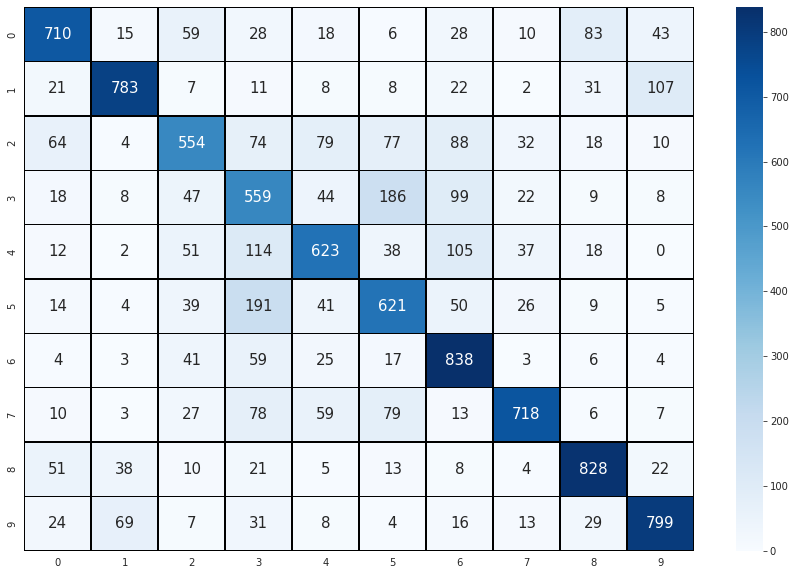

In [55]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

# Modelling-2

In [56]:
model= Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [58]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4356 - accuracy: 0.4769 - val_loss: 1.1264 - val_accuracy: 0.6004
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0321 - accuracy: 0.6345 - val_loss: 0.9502 - val_accuracy: 0.6649
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8951 - accuracy: 0.6835 - val_loss: 0.8509 - val_accuracy: 0.7075
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8259 - accuracy: 0.7088 - val_loss: 0.8615 - val_accuracy: 0.6988
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7654 - accuracy: 0.7291 - val_loss: 0.7599 - val_accuracy: 0.7370
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7239 - accuracy: 0.7436 - val_loss: 0.7558 - val_accuracy: 0.7388
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6868 - accuracy: 0.7560 - val_loss: 0.7541 - val_acc

In [59]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.436,0.477,1.126,0.600
1,1.032,0.635,0.950,0.665
2,0.895,0.683,0.851,0.707
3,0.826,0.709,0.861,0.699
4,0.765,0.729,0.760,0.737


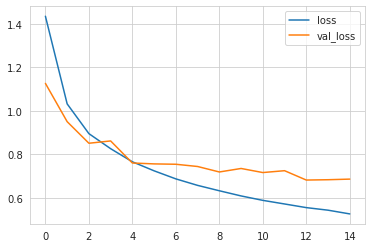

In [60]:
summary[["loss", "val_loss"]].plot();

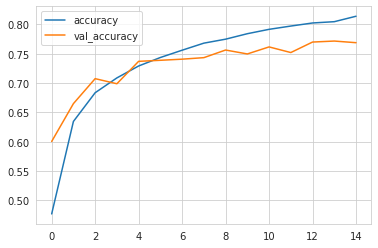

In [61]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [62]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6814 - accuracy: 0.7699


[0.6814113855361938, 0.7699000239372253]

In [63]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6814113855361938
Test accuracy: 0.7699000239372253


In [64]:
pred_prob = model.predict(X_test)

In [65]:
y_pred = np.argmax(pred_prob, axis=1)

In [66]:
y_pred

array([3, 8, 8, ..., 5, 0, 7])

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1000
           1       0.93      0.84      0.88      1000
           2       0.69      0.66      0.67      1000
           3       0.56      0.61      0.58      1000
           4       0.73      0.74      0.74      1000
           5       0.69      0.66      0.67      1000
           6       0.79      0.84      0.81      1000
           7       0.82      0.81      0.81      1000
           8       0.86      0.88      0.87      1000
           9       0.86      0.86      0.86      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



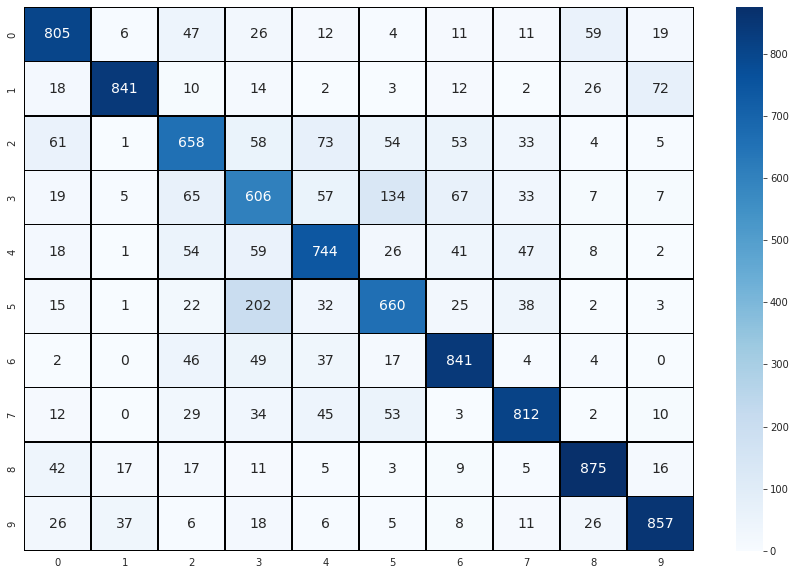

In [68]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

In [69]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

# Modelling-3

In [70]:
from tensorflow.keras.layers import BatchNormalization

**BatchNormalization**

- Layer that normalizes its inputs.
- Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
    - Technique for training very deep neural networks.
    - Standardizes the inputs to a layer for each mini-batch.
    - Stabilizes the learning process,
    - Reduces the number of training epochs.
![BN1.PNG](https://miro.medium.com/max/709/0*2qZOVh96GZ-a_XdS.png)
![BN2.PNG](https://cesarlaurent.files.wordpress.com/2015/04/bn.png)
![BN3.PNG](https://3.bp.blogspot.com/-ogeLSVo_Tek/WNPS4Glmd4I/AAAAAAAAKBo/bfp-KUSsFmQGolE0uNEeWFzDXA8IPU75wCLcB/s1600/Screenshot%2Bfrom%2B2017-03-23%2B21-50-33.png)

In [71]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [73]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 20s 11ms/step - loss: 1.9542 - accuracy: 0.3007 - val_loss: 1.6494 - val_accuracy: 0.3871
Epoch 2/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4616 - accuracy: 0.4688 - val_loss: 1.3649 - val_accuracy: 0.5282
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2483 - accuracy: 0.5656 - val_loss: 1.0780 - val_accuracy: 0.6153
Epoch 4/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1083 - accuracy: 0.6210 - val_loss: 0.8474 - val_accuracy: 0.7077
Epoch 5/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0225 - accuracy: 0.6562 - val_loss: 0.8625 - val_accuracy: 0.7013
Epoch 6/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9400 - accuracy: 0.6908 - val_loss: 0.7717 - val_accuracy: 0.7284
Epoch 7/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8742 - accuracy: 0.7140 - val_loss: 0.7059 -

In [74]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.954,0.301,1.649,0.387
1,1.462,0.469,1.365,0.528
2,1.248,0.566,1.078,0.615
3,1.108,0.621,0.847,0.708
4,1.022,0.656,0.862,0.701


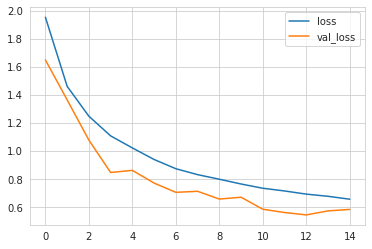

In [75]:
summary[["loss", "val_loss"]].plot();

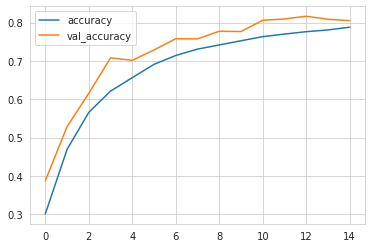

In [76]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [77]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.5449 - accuracy: 0.8164


[0.5448510646820068, 0.8163999915122986]

In [78]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5448510646820068
Test accuracy: 0.8163999915122986


In [79]:
pred_prob = model.predict(X_test)

In [80]:
y_pred = np.argmax(pred_prob, axis=1)

In [81]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1000
           1       0.91      0.92      0.91      1000
           2       0.73      0.74      0.74      1000
           3       0.79      0.52      0.63      1000
           4       0.73      0.87      0.80      1000
           5       0.73      0.75      0.74      1000
           6       0.78      0.93      0.85      1000
           7       0.89      0.85      0.87      1000
           8       0.94      0.85      0.89      1000
           9       0.84      0.93      0.88      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.81     10000
weighted avg       0.82      0.82      0.81     10000



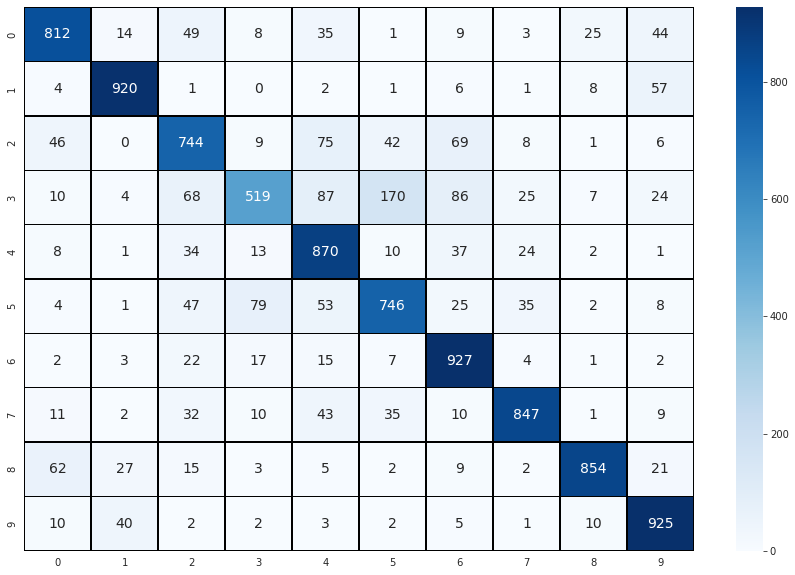

In [83]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

# Prediction

In [84]:
my_image = X_test[44]

In [85]:
my_image.shape

(32, 32, 3)

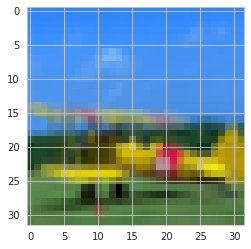

In [86]:
plt.imshow(my_image)

In [87]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

In [88]:
image_prediction

array([[9.95099843e-01, 2.91074772e-04, 7.08964188e-04, 2.99562598e-05,
        6.44951288e-05, 4.98707095e-06, 5.18921843e-05, 1.05445724e-04,
        1.29155396e-03, 2.35174107e-03]], dtype=float32)

In [89]:
np.argmax(image_prediction, axis=1)

array([0])

In [90]:
result=np.argmax(image_prediction, axis=1)

In [91]:
result

array([0])

In [92]:
classes[int(result)]

'airplane'

In [93]:
model.save("cnn-1.h5")

In [94]:
#finished

In [95]:
model=tf.keras.models.load_model('cnn-1.h5')

In [96]:
X_test[15].shape

(32, 32, 3)

In [97]:
# np.expand_dims(X_test[15],axis=0).shape

In [98]:
pred=model.predict(np.expand_dims(X_test[15],axis=0))

In [99]:
np.argmax(pred)

8

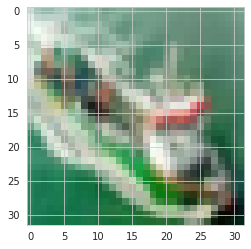

In [100]:
plt.imshow(X_test[15])

In [101]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']